### Leitura do Shape File


In [3]:
import geopandas as gpd

print("pacote carregado com sucesso")

pacote carregado com sucesso


In [4]:
MAPAS_PATH = "SHP/"

In [5]:
gdf = gpd.read_file(MAPAS_PATH + "BR_Municipios_2022.SHP")

<Axes: >

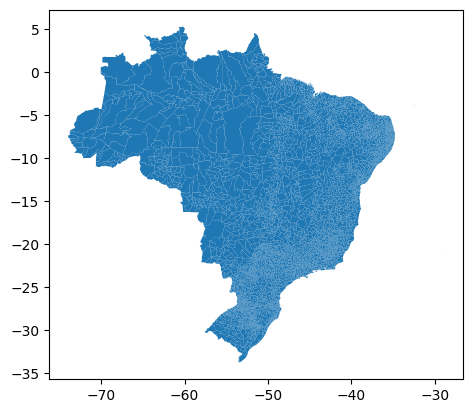

In [6]:
gdf.plot()

In [7]:
gdf[gdf.SIGLA_UF=="SP"] # Corta o último número do CD_MUN

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
3267,3500105,Adamantina,SP,411.987,"POLYGON ((-51.09557 -21.57029, -51.09617 -21.5..."
3268,3500204,Adolfo,SP,211.055,"POLYGON ((-49.61249 -21.26110, -49.61249 -21.2..."
3269,3500303,Aguaí,SP,474.554,"POLYGON ((-47.01254 -22.00527, -47.01219 -22.0..."
3270,3500402,Águas da Prata,SP,142.673,"POLYGON ((-46.71875 -21.95837, -46.71878 -21.9..."
3271,3500501,Águas de Lindóia,SP,60.126,"POLYGON ((-46.61761 -22.51172, -46.61864 -22.5..."
...,...,...,...,...,...
3907,3557006,Votorantim,SP,184.186,"POLYGON ((-47.42427 -23.52420, -47.42425 -23.5..."
3908,3557105,Votuporanga,SP,420.703,"POLYGON ((-49.98320 -20.57103, -49.98408 -20.5..."
3909,3557154,Zacarias,SP,319.056,"POLYGON ((-49.98507 -21.05306, -49.98518 -21.0..."
3910,3557204,Chavantes,SP,188.727,"POLYGON ((-49.72713 -23.10799, -49.72833 -23.1..."


In [8]:
# Quantidade total de Municipios

gdf.shape

(5572, 5)

### Leitura da base de dados de Beneficiários

In [9]:
from dask import dataframe as dd
import pandas as pd
import os
print("pacote importado")

pacote importado


In [10]:
caminho = 'Dados de Beneficiarios/'

In [11]:
# Leitura dos data frames
dataframes = []

for arquivo in os.listdir(caminho):
    if arquivo.endswith(".csv"):
        caminho_arquivo = os.path.join(caminho,arquivo)
        df = pd.read_csv(caminho_arquivo,sep=';', encoding='ISO-8859-1')
        dataframes.append(df)

# Concatena todos os DatasFrames em um unico DataFrame
        
dataframe_final = pd.concat(dataframes,ignore_index=True)

In [12]:
# Tamanho do data Set final

print(f"Quantidade de linhas {dataframe_final.shape[0]} quantidade de colunas {dataframe_final.shape[1]}")

Quantidade de linhas 16865481 quantidade de colunas 22


In [13]:
# Análise de valores faltantes

dataframe_final.isnull().sum()

#ID_CMPT_MOVEL               0
CD_OPERADORA                 0
NM_RAZAO_SOCIAL              0
NR_CNPJ                      0
MODALIDADE_OPERADORA         0
SG_UF                        0
CD_MUNICIPIO                 0
NM_MUNICIPIO                 0
TP_SEXO                      0
DE_FAIXA_ETARIA              0
DE_FAIXA_ETARIA_REAJ         0
CD_PLANO                     4
TP_VIGENCIA_PLANO            0
DE_CONTRATACAO_PLANO         0
DE_SEGMENTACAO_PLANO         0
DE_ABRG_GEOGRAFICA_PLANO     0
COBERTURA_ASSIST_PLAN        0
TIPO_VINCULO                 0
QT_BENEFICIARIO_ATIVO        0
QT_BENEFICIARIO_ADERIDO      0
QT_BENEFICIARIO_CANCELADO    0
DT_CARGA                     0
dtype: int64

In [14]:
import  duckdb as db

In [15]:
db.query("SELECT*FROM dataframe_final limit(10)").to_df()

,#ID_CMPT_MOVEL,CD_OPERADORA,NM_RAZAO_SOCIAL,NR_CNPJ,MODALIDADE_OPERADORA,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,TP_SEXO,DE_FAIXA_ETARIA,...,TP_VIGENCIA_PLANO,DE_CONTRATACAO_PLANO,DE_SEGMENTACAO_PLANO,DE_ABRG_GEOGRAFICA_PLANO,COBERTURA_ASSIST_PLAN,TIPO_VINCULO,QT_BENEFICIARIO_ATIVO,QT_BENEFICIARIO_ADERIDO,QT_BENEFICIARIO_CANCELADO,DT_CARGA
0,202312,403911,VISION MED ASSISTÊNCIA MÉDICA LTDA,1518211000183,MEDICINA DE GRUPO,AC,120040,RIO BRANCO,F,41 a 45 anos,...,A,COLETIVO EMPRESARIAL,AMBULATORIAL + HOSPITALAR COM OBSTETRÍCIA,GRUPO DE ESTADOS,Médico-hospitalar,DEPENDENTE,1,0,0,16/01/2024
1,202312,346659,CAIXA DE ASSISTÊNCIA DOS FUNCIONÁRIOS DO BANCO...,33719485000127,AUTOGESTÃO,AC,120020,CRUZEIRO DO SUL,M,16 a 20 anos,...,P,COLETIVO EMPRESARIAL,AMBULATORIAL + HOSPITALAR COM OBSTETRÍCIA,NACIONAL,Médico-hospitalar,TITULAR,1,0,0,16/01/2024
2,202312,368253,HAPVIDA ASSISTENCIA MEDICA S.A.,63554067000198,MEDICINA DE GRUPO,AC,120040,RIO BRANCO,M,06 a 10 anos,...,P,COLETIVO EMPRESARIAL,ODONTOLÓGICO,NACIONAL,Odontológico,DEPENDENTE,3,0,0,16/01/2024
3,202312,337871,UNIMED RIO BRANCO COOPERATIVA DE TRABALHO MEDI...,84313741000112,COOPERATIVA MÉDICA,AC,120040,RIO BRANCO,F,61 ou mais,...,P,INDIVIDUAL OU FAMILIAR,AMBULATORIAL + HOSPITALAR SEM OBSTETRÍCIA,NACIONAL,Médico-hospitalar,DEPENDENTE,2,0,0,16/01/2024
4,202312,326305,AMIL ASSISTÊNCIA MÉDICA INTERNACIONAL S.A.,29309127000179,MEDICINA DE GRUPO,AC,120040,RIO BRANCO,F,51 a 55 anos,...,P,COLETIVO EMPRESARIAL,AMBULATORIAL + HOSPITALAR COM OBSTETRÍCIA,NACIONAL,Médico-hospitalar,TITULAR,1,0,0,16/01/2024
5,202312,5711,BRADESCO SAÚDE S.A.,92693118000160,SEGURADORA ESPECIALIZADA EM SAÚDE,AC,120020,CRUZEIRO DO SUL,M,41 a 45 anos,...,P,COLETIVO EMPRESARIAL,AMBULATORIAL + HOSPITALAR COM OBSTETRÍCIA,NACIONAL,Médico-hospitalar,TITULAR,4,1,0,16/01/2024
6,202312,337871,UNIMED RIO BRANCO COOPERATIVA DE TRABALHO MEDI...,84313741000112,COOPERATIVA MÉDICA,AC,120040,RIO BRANCO,F,16 a 20 anos,...,A,INDIVIDUAL OU FAMILIAR,AMBULATORIAL + HOSPITALAR COM OBSTETRÍCIA,NACIONAL,Médico-hospitalar,DEPENDENTE,1,0,0,16/01/2024
7,202312,337871,UNIMED RIO BRANCO COOPERATIVA DE TRABALHO MEDI...,84313741000112,COOPERATIVA MÉDICA,AC,120040,RIO BRANCO,F,51 a 55 anos,...,P,COLETIVO POR ADESÃO,AMBULATORIAL + HOSPITALAR COM OBSTETRÍCIA,NACIONAL,Médico-hospitalar,TITULAR,6,0,0,16/01/2024
8,202312,339679,UNIMED NACIONAL - COOPERATIVA CENTRAL,2812468000106,COOPERATIVA MÉDICA,AC,120040,RIO BRANCO,F,00 a 05 anos,...,P,COLETIVO EMPRESARIAL,AMBULATORIAL + HOSPITALAR COM OBSTETRÍCIA,NACIONAL,Médico-hospitalar,DEPENDENTE,2,0,0,16/01/2024
9,202312,382337,UNIODONTO METROPOLITANA COOPERATIVA ODONTOLÓGICA.,1066312000160,COOPERATIVA ODONTOLÓGICA,AC,120040,RIO BRANCO,F,46 a 50 anos,...,P,INDIVIDUAL OU FAMILIAR,ODONTOLÓGICO,GRUPO DE MUNICÍPIOS,Odontológico,DEPENDENTE,1,0,0,16/01/2024


In [16]:
db.query("SELECT NM_RAZAO_SOCIAL,SUM(QT_BENEFICIARIO_ATIVO) AS SOMA_ATIVOS FROM dataframe_final GROUP BY NM_RAZAO_SOCIAL order by 2 desc").to_df()

,NM_RAZAO_SOCIAL,SOMA_ATIVOS
0,ODONTOPREV S/A,7690184.0
1,HAPVIDA ASSISTENCIA MEDICA S.A.,7623721.0
2,NOTRE DAME INTERMÉDICA SAÚDE S.A.,6522807.0
3,AMIL ASSISTÊNCIA MÉDICA INTERNACIONAL S.A.,5121018.0
4,SUL AMERICA COMPANHIA DE SEGURO SAÚDE,3736735.0
...,...,...
911,PLAMEDH - PLANO DE ASSISTÊNCIA MÉDICO-HOSPITAL...,2.0
912,ODONTOBRAS PLANOS ODONTOLOGICOS LTDA,2.0
913,IPRESB - INSTITUTO DE PREVENÇÃO EM SAÚDE BUCAL...,2.0
914,ALPHA DENTAL PLANO DE SAUDE LTDA ME,1.0


###  O primeiro filtro que deve fazer é olhar apenas medico-hospitalar

In [17]:
df_filtro = pd.DataFrame.copy(dataframe_final)

In [18]:
df_filtro = df_filtro[df_filtro.COBERTURA_ASSIST_PLAN == "Médico-hospitalar"]

In [19]:
df_filtro.shape

(11168221, 22)

## Análise Descritiva

### Quantidade total de beneficiarios

In [20]:
db.query("SELECT SUM(QT_BENEFICIARIO_ATIVO) AS SOMA_ATIVOS FROM df_filtro")

┌─────────────┐
│ SOMA_ATIVOS │
│   int128    │
├─────────────┤
│    51040452 │
└─────────────┘

### Principais operadoras de saúde do brasil


In [21]:
db.query("SELECT NM_RAZAO_SOCIAL,SUM(QT_BENEFICIARIO_ATIVO) AS SOMA_ATIVOS FROM df_filtro GROUP BY NM_RAZAO_SOCIAL order by 2 desc limit 11").to_df()

,NM_RAZAO_SOCIAL,SOMA_ATIVOS
0,HAPVIDA ASSISTENCIA MEDICA S.A.,4170474.0
1,BRADESCO SAÚDE S.A.,3394714.0
2,NOTRE DAME INTERMÉDICA SAÚDE S.A.,3336003.0
3,AMIL ASSISTÊNCIA MÉDICA INTERNACIONAL S.A.,2808700.0
4,SUL AMERICA COMPANHIA DE SEGURO SAÚDE,2093685.0
5,UNIMED NACIONAL - COOPERATIVA CENTRAL,2071195.0
6,UNIMED BELO HORIZONTE COOPERATIVA DE TRABALHO ...,1564177.0
7,UNIMED SEGUROS SAÚDE S/A,797299.0
8,UNIMED PORTO ALEGRE - COOPERATIVA MÉDICA LTDA.,625241.0
9,UNIMED CURITIBA - SOCIEDADE COOPERATIVA DE MÉD...,615441.0


### Principais Municipios com mais beneficiários

In [22]:
db.query("SELECT NM_MUNICIPIO,SUM(QT_BENEFICIARIO_ATIVO) AS SOMA_ATIVOS FROM df_filtro GROUP BY NM_MUNICIPIO order by 2 desc limit 11").to_df()

,NM_MUNICIPIO,SOMA_ATIVOS
0,SAO PAULO,5937045.0
1,RIO DE JANEIRO,3253389.0
2,BELO HORIZONTE,1269441.0
3,CURITIBA,995162.0
4,FORTALEZA,958139.0
5,BRASILIA,948619.0
6,SALVADOR,821900.0
7,RECIFE,654009.0
8,GUARULHOS,614131.0
9,PORTO ALEGRE,604836.0


### Principais estados com mais beneficiarios



In [23]:
db.query("SELECT SG_UF,SUM(QT_BENEFICIARIO_ATIVO) AS SOMA_ATIVOS FROM df_filtro GROUP BY sg_uf order by 2 desc").to_df()

,SG_UF,SOMA_ATIVOS
0,SP,18206824.0
1,MG,5690883.0
2,RJ,5681542.0
3,PR,3099768.0
4,RS,2618207.0
5,BA,1697370.0
6,SC,1669751.0
7,PE,1415781.0
8,GO,1369809.0
9,CE,1357255.0


### Análise por tipo de contratação

In [24]:
db.query("SELECT DE_CONTRATACAO_PLANO,SUM(QT_BENEFICIARIO_ATIVO) AS SOMA_ATIVOS FROM df_filtro GROUP BY DE_CONTRATACAO_PLANO order by 2 desc limit 11").to_df()

,DE_CONTRATACAO_PLANO,SOMA_ATIVOS
0,COLETIVO EMPRESARIAL,36024044.0
1,INDIVIDUAL OU FAMILIAR,8835801.0
2,COLETIVO POR ADESÃO,6179540.0
3,COLETIVO POR ADESÃO COM PATROCÍNIO,706.0
4,COLETIVO EMPRESARIAL + COLETIVO POR ADESÃO,216.0
5,COLETIVO EMPRESARIAL COM PATROCÍNIO,54.0
6,COLETIVO POR ADESÃO SEM PATROCÍNIO,38.0
7,Não Identificado,29.0
8,INDIVIDUAL OU FAMILIAR + COLETIVO EMPRESARIAL,19.0
9,COLETIVO EMPRESARIAL SEM PATROCÍNIO,5.0


### Criando o data frame de estado e municipio para a correlação

In [25]:
df_municipio = db.query("SELECT NM_MUNICIPIO,CD_MUNICIPIO, SUM(QT_BENEFICIARIO_ATIVO) AS BENF_ATIVO FROM df_filtro GROUP BY NM_MUNICIPIO,CD_MUNICIPIO").to_df()

In [36]:
df_municipio.to_csv("df_municipio.csv")

In [26]:
df_estado= db.query("SELECT SG_UF, SUM(QT_BENEFICIARIO_ATIVO) AS BENF_ATIVO FROM df_filtro GROUP BY SG_UF").to_df()

In [38]:
df_estado.to_csv("df_estado.csv")

## Análise espacial

In [27]:
# Pacotes necessarios
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

## Pacotes PySAL
# libpysal: Biblioteca core do PySAL. Utilizamos o método de vizinhança Queen
from libpysal.weights.contiguity import Queen
# ESDA (Exploratory Spatial Data Analysis): utilizamos para o cálculo de correlação
from esda.moran import Moran, Moran_Local, Moran_BV, Moran_Local_BV
# SPlot: Utilizamos para fazer os plots espaciais
from splot.esda import moran_scatterplot, plot_local_autocorrelation, lisa_cluster, plot_moran_bv

print("pacotes carregados")

pacotes carregados


Agora setamos o tipo de contiguidade que desejamos.Existem dois tipos predefindos para definir vizinhança, que são o Rock e o Queen. A contiguidade Rock considera vizinhos aquelas regiões que tem borda em comum.  A contiguidade Queen é uma extensão da contiguidade Rock que considera também como vizinhos regiões cuja borda contem somete um ponto em comum


Vamos considerar o método Queen para calcular a matriz de contiguidade

In [28]:
weights = Queen.from_dataframe(gdf)

C:\Users\carlo\AppData\Local\Temp\ipykernel_18860\524268471.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  weights = Queen.from_dataframe(gdf)
C:\Users\carlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 1525, 3499.
  warnings.warn(message)


In [29]:
W_matrix,ids = weights.full()

In [30]:
# Normalizando a matriz por linhas (r)

weights.transform = 'r'

('WARNING: ', 1525, ' is an island (no neighbors)')
('WARNING: ', 3499, ' is an island (no neighbors)')


In [31]:
W_matrix,ids = weights.full()

In [32]:
W_matrix[0]

array([0., 0., 0., ..., 0., 0., 0.])

### Preparando os dados de municipios com os shape file


In [33]:
gdf[gdf.SIGLA_UF=="SP"]

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
3267,3500105,Adamantina,SP,411.987,"POLYGON ((-51.09557 -21.57029, -51.09617 -21.5..."
3268,3500204,Adolfo,SP,211.055,"POLYGON ((-49.61249 -21.26110, -49.61249 -21.2..."
3269,3500303,Aguaí,SP,474.554,"POLYGON ((-47.01254 -22.00527, -47.01219 -22.0..."
3270,3500402,Águas da Prata,SP,142.673,"POLYGON ((-46.71875 -21.95837, -46.71878 -21.9..."
3271,3500501,Águas de Lindóia,SP,60.126,"POLYGON ((-46.61761 -22.51172, -46.61864 -22.5..."
...,...,...,...,...,...
3907,3557006,Votorantim,SP,184.186,"POLYGON ((-47.42427 -23.52420, -47.42425 -23.5..."
3908,3557105,Votuporanga,SP,420.703,"POLYGON ((-49.98320 -20.57103, -49.98408 -20.5..."
3909,3557154,Zacarias,SP,319.056,"POLYGON ((-49.98507 -21.05306, -49.98518 -21.0..."
3910,3557204,Chavantes,SP,188.727,"POLYGON ((-49.72713 -23.10799, -49.72833 -23.1..."


In [34]:
# Cortando o último número

def cortar_ultimo_digito(valor):
     return int(str(valor)[:-1])


gdf["CD_MUN_LIG"] = gdf['CD_MUN'].apply(cortar_ultimo_digito)

gdf

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,CD_MUN_LIG
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...",110001
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.17933 -10.13924, -63.17746 -10.1...",110002
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.52408 -13.32137, -60.37162 -13.3...",110003
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.35502 -11.50452, -61.35524 -11.5...",110004
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-60.82135 -13.11910, -60.81773 -13.1...",110005
...,...,...,...,...,...,...
5567,5222005,Vianópolis,GO,954.115,"POLYGON ((-48.31126 -16.84221, -48.31170 -16.8...",522200
5568,5222054,Vicentinópolis,GO,733.794,"POLYGON ((-49.73613 -17.74427, -49.73624 -17.7...",522205
5569,5222203,Vila Boa,GO,1052.593,"POLYGON ((-47.07780 -15.06364, -47.07799 -15.0...",522220
5570,5222302,Vila Propício,GO,2181.593,"POLYGON ((-48.58713 -15.31847, -48.58714 -15.3...",522230


In [35]:
df_final = pd.merge(
    gdf,
    df_municipio,
    left_on="CD_MUN_LIG",
    right_on ="CD_MUNICIPIO",
    how = "left"
)

In [39]:
df_final

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,CD_MUN_LIG,NM_MUNICIPIO,CD_MUNICIPIO,BENF_ATIVO
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...",110001,ALTA FLORESTA D'OESTE,110001.0,1063.0
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.17933 -10.13924, -63.17746 -10.1...",110002,ARIQUEMES,110002.0,5743.0
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.52408 -13.32137, -60.37162 -13.3...",110003,CABIXI,110003.0,160.0
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.35502 -11.50452, -61.35524 -11.5...",110004,CACOAL,110004.0,9232.0
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-60.82135 -13.11910, -60.81773 -13.1...",110005,CEREJEIRAS,110005.0,783.0
...,...,...,...,...,...,...,...,...,...
5567,5222005,Vianópolis,GO,954.115,"POLYGON ((-48.31126 -16.84221, -48.31170 -16.8...",522200,VIANOPOLIS,522200.0,1026.0
5568,5222054,Vicentinópolis,GO,733.794,"POLYGON ((-49.73613 -17.74427, -49.73624 -17.7...",522205,VICENTINOPOLIS,522205.0,1543.0
5569,5222203,Vila Boa,GO,1052.593,"POLYGON ((-47.07780 -15.06364, -47.07799 -15.0...",522220,VILA BOA,522220.0,70.0
5570,5222302,Vila Propício,GO,2181.593,"POLYGON ((-48.58713 -15.31847, -48.58714 -15.3...",522230,VILA PROPICIO,522230.0,233.0


In [54]:
df_final[df_final.isnull().any(axis=1)]

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,CD_MUN_LIG,NM_MUNICIPIO,CD_MUNICIPIO,BENF_ATIVO
346,1704600,Chapada de Areia,TO,658.564,"POLYGON ((-49.23133 -10.18062, -49.23139 -10.1...",170460,NaN,NaN,NaN
1433,2514651,São José do Brejo do Cruz,PB,253.787,"POLYGON ((-37.33142 -6.17409, -37.33129 -6.174...",251465,NaN,NaN,NaN


In [55]:
df_final_2 = df_final.dropna()

In [56]:
weights2 = Queen.from_dataframe(df_final_2)

C:\Users\carlo\AppData\Local\Temp\ipykernel_18860\1783079649.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  weights2 = Queen.from_dataframe(df_final_2)
C:\Users\carlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 1523, 3497.
  warnings.warn(message)


# Autocorrelação espacial global



In [57]:
y = df_final_2["BENF_ATIVO"].copy()



In [58]:
moran = Moran(y,weights2)

('WARNING: ', 1523, ' is an island (no neighbors)')
('WARNING: ', 3497, ' is an island (no neighbors)')


In [59]:
moran.I


0.11296123730428163

In [60]:
print(f"P-VALOR DE I = {moran.p_sim}") # Existe uma autocorrelação espacial positiva na Variável Benf_ativos ou seja 

P-VALOR DE I = 0.002


In [61]:
print(f"Esperança de I = {moran.EI_sim}")

Esperança de I = -9.01397675741418e-05


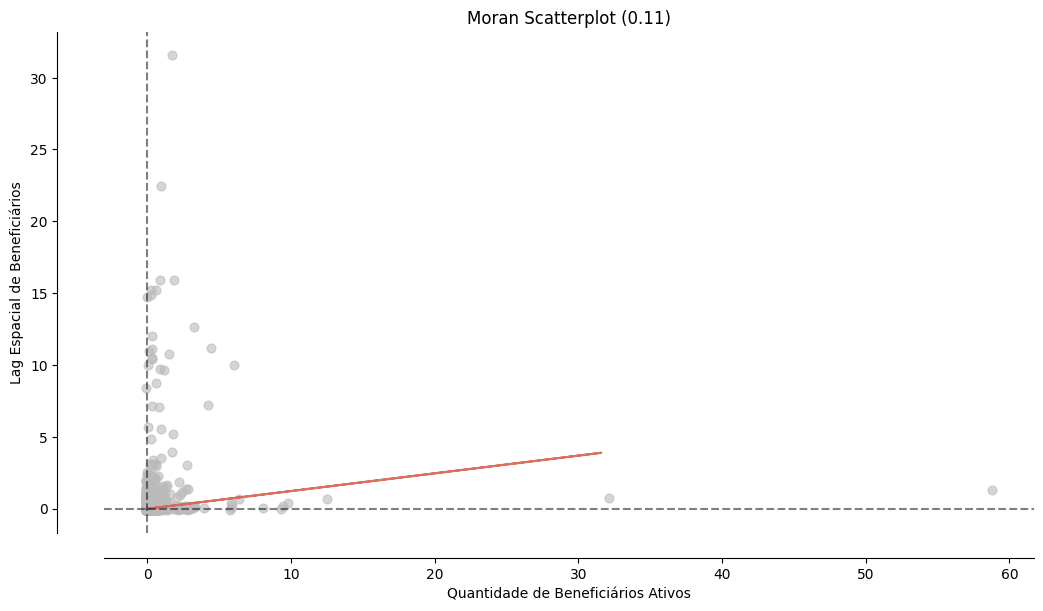

In [66]:
# Define o tamanho da figura
fig, ax = plt.subplots(figsize=(12, 10))

# Plota o scatterplot com o tamanho da figura aumentado
moran_scatterplot(moran, ax=ax, aspect_equal=True)
ax.set_xlabel("Quantidade de Beneficiários Ativos")
ax.set_ylabel("Lag Espacial de Beneficiários")
plt.show()

### Análise de Moran Local

In [68]:
moran_loc = Moran_Local(y,weights2)

C:\Users\carlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\esda\moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


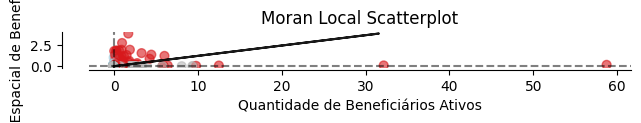

In [71]:

fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel("Quantidade de Beneficiários Ativos")
ax.set_ylabel("Lag Espacial de Beneficiários")
plt.show()

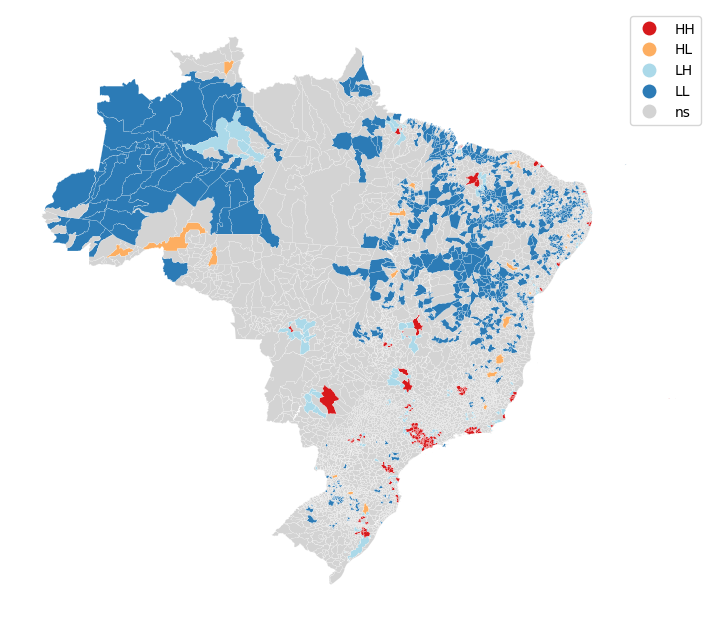

In [73]:
lisa_cluster(moran_loc,df_final_2,p=0.05,figsize=(9,9))
plt.show()

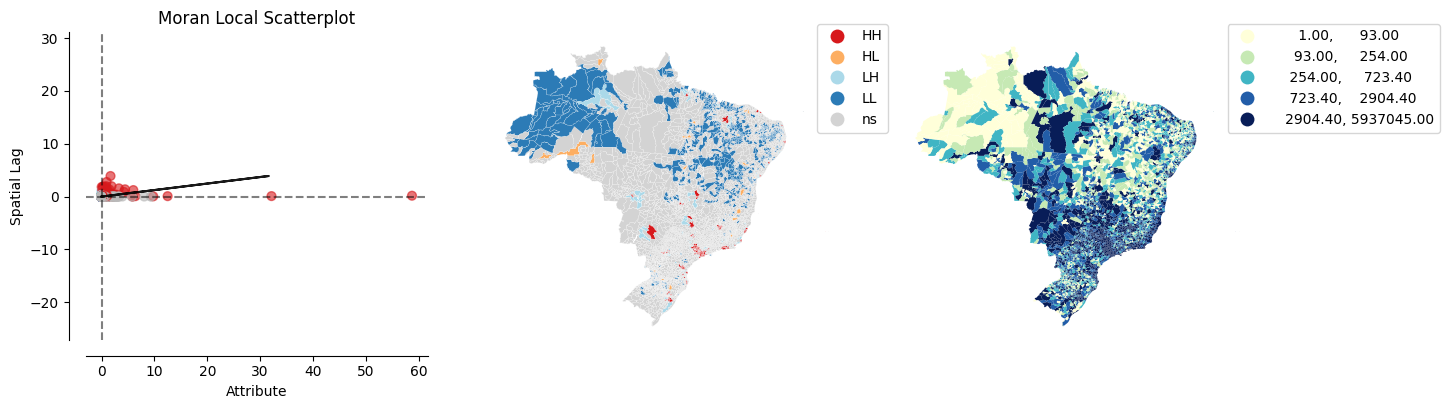

In [76]:
plot_local_autocorrelation(moran_loc,df_final_2,'BENF_ATIVO')
plt.show()